In [29]:
# In the CMAPSS dataset, the test data and RUL files are separate
# # The RUL (Remaining Useful Life) files in the NASA CMAPSS dataset contain the Remaining Useful Life information for each engine unit in the test set. The RUL represents how many operational cycles an engine has left before it reaches failure

# What RUL Files Contain:

#     Test Data in the CMAPSS dataset is truncated, meaning that it doesn’t show the engine’s complete run-to-failure cycle.
#     The RUL file provides the actual number of cycles left (Remaining Useful Life) from the last recorded cycle in the test data until the failure for each engine.

# For example, if the RUL for an engine is 50 cycles, that means the engine would fail after 50 more cycles starting from the last recorded point in the test data.


#     Structure of RUL Files:

# Typically, the RUL files in this dataset are simple text files (.txt), and each row corresponds to a specific engine in the test set.

#     1st row: RUL of engine unit 1 in the test set.
#     2nd row: RUL of engine unit 2 in the test set.
#     And so on.

# Example:

# Assume we have 100 engines in the test set. The RUL_FD001.txt file will contain 100 rows. Each row gives us the number of remaining cycles for each engine at the time the test data was collected.

# Usage in Model Evaluation:

# When making predictions on the test data, our goal is to predict the Remaining Useful Life (RUL) of each engine. After training the model, we can compare your predicted RUL against the values in the RUL file to evaluate your model's performance.



In [30]:
import pandas as pd

# Load the training data
train_data = pd.read_csv('../Nassturboengine/test_FD001.txt', delim_whitespace=True, header=None)

# Define column names based on the dataset description
columns = ['unit_number', 'time_in_cycles', 'operational_setting_1', 
           'operational_setting_2', 'operational_setting_3'] + \
          ['sensor_measurement_' + str(i) for i in range(1, 22)]

train_data.columns = columns

# Check the first few rows of the training data
train_data.head()


unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                 0.0023                 0.0003   
1            1               2                -0.0027                -0.0003   
2            1               3                 0.0003                 0.0001   
3            1               4                 0.0042                 0.0000   
4            1               5                 0.0014                 0.0000   

   operational_setting_3  sensor_measurement_1  sensor_measurement_2  \
0                  100.0                518.67                643.02   
1                  100.0                518.67                641.71   
2                  100.0                518.67                642.46   
3                  100.0                518.67                642.44   
4                  100.0                518.67                642.51   

   sensor_measurement_3  sensor_measurement_4  sensor_measurement_5  ...  \
0               1585.29               1398.21                 14.62  ...   
1               1588.45               1395.42                 14.62  ...   
2               1586.94               1401.34                 14.62  ...   
3               1584.12               1406.42                 14.62  ...   
4               1587.19               1401.92                 14.62  ...   

   sensor_measurement_12  sensor_measurement_13  sensor_measurement_14  \
0                 521.72                2388.03                8125.55   
1                 522.16                2388.06                8139.62   
2                 521.97                2388.03                8130.10   
3                 521.38                2388.05                8132.90   
4                 522.15                2388.03                8129.54   

   sensor_measurement_15  sensor_measurement_16  sensor_measurement_17  \
0                 8.4052                   0.03                    392   
1                 8.3803                   0.03                    393   
2                 8.4441                   0.03                    393   
3                 8.3917                   0.03                    391   
4                 8.4031                   0.03                    390   

   sensor_measurement_18  sensor_measurement_19  sensor_measurement_20  \
0                   2388                  100.0                  38.86   
1                   2388                  100.0                  39.02   
2                   2388                  100.0                  39.08   
3                   2388                  100.0                  39.00   
4                   2388                  100.0                  38.99   

   sensor_measurement_21  
0                23.3735  
1                23.3916  
2                23.4166  
3                23.3737  
4                23.4130  

[5 rows x 26 columns]

In [31]:
train_data.describe()

unit_number  time_in_cycles  operational_setting_1  \
count  13096.000000    13096.000000           13096.000000   
mean      51.543907       76.836515              -0.000011   
std       28.289423       53.057749               0.002203   
min        1.000000        1.000000              -0.008200   
25%       28.000000       33.000000              -0.001500   
50%       52.000000       69.000000              -0.000000   
75%       76.000000      113.000000               0.001500   
max      100.000000      303.000000               0.007800   

       operational_setting_2  operational_setting_3  sensor_measurement_1  \
count           13096.000000                13096.0          1.309600e+04   
mean                0.000004                  100.0          5.186700e+02   
std                 0.000294                    0.0          6.014263e-11   
min                -0.000600                  100.0          5.186700e+02   
25%                -0.000200                  100.0          5.186700e+02   
50%                -0.000000                  100.0          5.186700e+02   
75%                 0.000300                  100.0          5.186700e+02   
max                 0.000700                  100.0          5.186700e+02   

       sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  \
count          13096.000000          13096.000000          13096.000000   
mean             642.475088           1588.099204           1404.735362   
std                0.400899              5.003274              6.688309   
min              641.130000           1569.040000           1384.390000   
25%              642.197500           1584.600000           1399.950000   
50%              642.460000           1587.990000           1404.440000   
75%              642.740000           1591.362500           1409.050000   
max              644.300000           1607.550000           1433.360000   

       sensor_measurement_5  ...  sensor_measurement_12  \
count          1.309600e+04  ...           13096.000000   
mean           1.462000e+01  ...             521.747724   
std            2.671743e-12  ...               0.559627   
min            1.462000e+01  ...             519.380000   
25%            1.462000e+01  ...             521.380000   
50%            1.462000e+01  ...             521.780000   
75%            1.462000e+01  ...             522.150000   
max            1.462000e+01  ...             523.760000   

       sensor_measurement_13  sensor_measurement_14  sensor_measurement_15  \
count           13096.000000           13096.000000           13096.000000   
mean             2388.071025            8138.947817               8.425844   
std                 0.056934              10.188605               0.029009   
min              2387.890000            8108.500000               8.332800   
25%              2388.030000            8132.310000               8.405600   
50%              2388.070000            8138.390000               8.424900   
75%              2388.110000            8144.360000               8.444300   
max              2388.320000            8220.480000               8.541400   

       sensor_measurement_16  sensor_measurement_17  sensor_measurement_18  \
count           1.309600e+04           13096.000000                13096.0   
mean            3.000000e-02             392.571625                 2388.0   
std             8.823140e-15               1.233577                    0.0   
min             3.000000e-02             389.000000                 2388.0   
25%             3.000000e-02             392.000000                 2388.0   
50%             3.000000e-02             393.000000                 2388.0   
75%             3.000000e-02             393.000000                 2388.0   
max             3.000000e-02             397.000000                 2388.0   

       sensor_measurement_19  sensor_measurement_20  sensor_measurement_21  
count                13096.0           13096.000000           13

In [32]:
#understand the structure and content
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            13096 non-null  int64  
 1   time_in_cycles         13096 non-null  int64  
 2   operational_setting_1  13096 non-null  float64
 3   operational_setting_2  13096 non-null  float64
 4   operational_setting_3  13096 non-null  float64
 5   sensor_measurement_1   13096 non-null  float64
 6   sensor_measurement_2   13096 non-null  float64
 7   sensor_measurement_3   13096 non-null  float64
 8   sensor_measurement_4   13096 non-null  float64
 9   sensor_measurement_5   13096 non-null  float64
 10  sensor_measurement_6   13096 non-null  float64
 11  sensor_measurement_7   13096 non-null  float64
 12  sensor_measurement_8   13096 non-null  float64
 13  sensor_measurement_9   13096 non-null  float64
 14  sensor_measurement_10  13096 non-null  float64
 15  se

#### 1. data pre-processing

In [34]:
# Handle Sensor Noise: Since the data contains sensor noise, apply 
# filtering techniques like rolling averages or smoothing to reduce noise without losing valuable trends.

#    - Normalize/Scale the Features: Normalize the sensor readings and operational settings using techniques like Min-Max scaling or Z-score normalization to ensure all features are on the same scale.


#    - Handle Missing Data: If any missing values exist, handle them using forward filling, mean imputation, or other methods depending on the context.

In [35]:
# Load the test data
test_data = pd.read_csv('../Nassturboengine/test_FD001.txt', delim_whitespace=True, header=None)
test_data.columns = columns  

# Load the RUL file (Remaining Useful Life)
rul_data = pd.read_csv('../Nassturboengine/RUL_FD001.txt', header=None)
rul_data.columns = ['RUL']  # RUL data has one column representing the Remaining Useful Life

# Check the first few rows
test_data.head()
rul_data.head()


RUL
0  112
1   98
2   69
3   82
4   91

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to scale
scale_columns = ['operational_setting_1', 'operational_setting_2', 'operational_setting_3'] + \
                [f'sensor_measurement_{i}' for i in range(1, 22)]

# Scale the data
scaler = MinMaxScaler()
train_data[scale_columns] = scaler.fit_transform(train_data[scale_columns])
test_data[scale_columns] = scaler.transform(test_data[scale_columns])

# Check for missing values
print(train_data.isnull().sum())


unit_number              0
time_in_cycles           0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64


In [37]:
## explore the statistics and structure of the data

#### 1.2 Visualizing Sensor Data

In [39]:
# Visualize the time-series data from the sensors to understand the trends and behavior of degradation

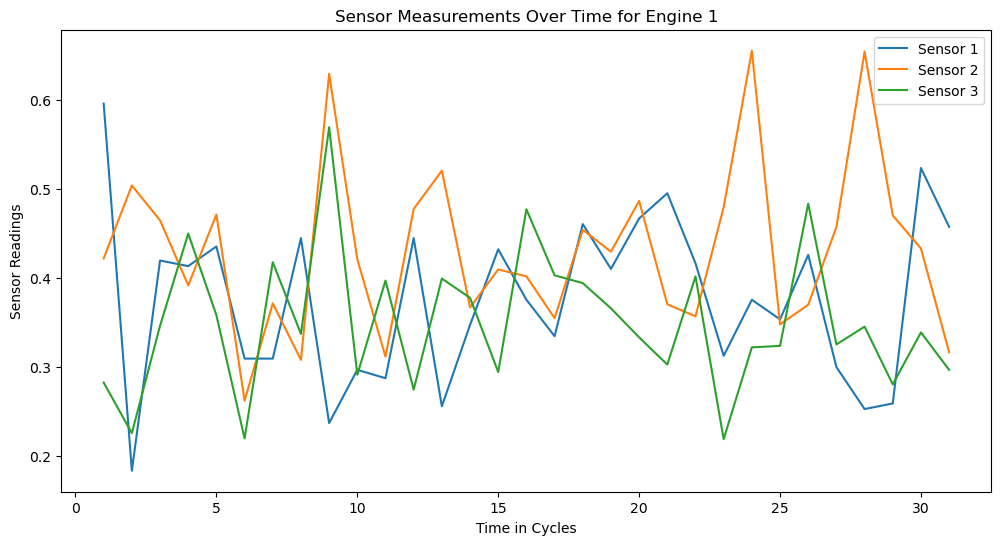

In [40]:
import matplotlib.pyplot as plt

# Plot a few sensor measurements for the first engine
engine_1 = train_data[train_data['unit_number'] == 1]

plt.figure(figsize=(12, 6))
for i in range(6, 9):  # Plot the first few sensors
    plt.plot(engine_1['time_in_cycles'], engine_1.iloc[:, i], label=f'Sensor {i-5}')
    
plt.xlabel('Time in Cycles')
plt.ylabel('Sensor Readings')
plt.title('Sensor Measurements Over Time for Engine 1')
plt.legend()
plt.show()


#### Step 2: Feature Engineering

In [42]:

# 2.1 Time-Series Feature Extraction

# generate some rolling statistics and lag features to capture temporal dependencies in the data.

In [43]:
# Rolling statistics and lag features
window_size = 5
for i in range(6, 26):
    train_data[f'sensor_{i-5}_rolling_mean'] = train_data.iloc[:, i].rolling(window=window_size).mean()
    train_data[f'sensor_{i-5}_rolling_std'] = train_data.iloc[:, i].rolling(window=window_size).std()
    train_data[f'sensor_{i-5}_lag_1'] = train_data.iloc[:, i].shift(1)

# Drop NaN values created by rolling and lag operations
train_data.dropna(inplace=True)


#### 2.2 Dimensionality Reduction with PCA

In [45]:
# This is done to reduce the dimensionality of sensor data, we'll apply PCA.

In [46]:
from sklearn.decomposition import PCA

# Select the sensor data for PCA
sensor_columns = [f'sensor_measurement_{i}' for i in range(1, 22)]
pca = PCA(n_components=10)  # Keep 10 components
train_data_pca = pca.fit_transform(train_data[sensor_columns])

# Add the PCA components back to the dataset
for i in range(10):
    train_data[f'PCA_{i+1}'] = train_data_pca[:, i]


#### Step 3: Model Building

In [48]:
# Compute RUL for the training data
train_data['RUL'] = train_data.groupby('unit_number')['time_in_cycles'].transform(lambda x: x.max() - x)
train_data[['unit_number', 'time_in_cycles', 'RUL']].head()


unit_number  time_in_cycles  RUL
4            1               5   26
5            1               6   25
6            1               7   24
7            1               8   23
8            1               9   22

In [49]:
# training a simple XGBoost model and then move to a LSTM for time-series prediction

In [50]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Prepare the features and target
X = train_data.drop(['unit_number', 'time_in_cycles', 'RUL'], axis=1)
y = train_data['RUL']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_val)


In [51]:
# LSTM for Time-Series Prediction:

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data for LSTM
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_lstm = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))

# Compile and train the model
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val))


Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - loss: 6961.5776 - val_loss: 2945.6848
Epoch 2/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 2789.3042 - val_loss: 2649.6411
Epoch 3/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 2512.3494 - val_loss: 2379.0559
Epoch 4/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 2371.2161 - val_loss: 2307.2373
Epoch 5/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 2211.3242 - val_loss: 2280.2932
Epoch 6/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 2276.2537 - val_loss: 2275.0964
Epoch 7/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 2190.9092 - val_loss: 2270.2292
Epoch 8/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 2218.5156 - val_loss: 2256.8967
Epoch 9/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 2224.1450 - val_loss: 2258.7742
Epoch 10/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 2264.5010 - val_loss: 2256.3271


#### Step 4: Model Optimization

In [54]:
# Hyperparameter Tuning

# Using Grid Search or Random Search to find the best hyperparameters for models like XGBoost.

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200], 'max_depth': [3, 5, 7]}
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

#### Step 5: Model Evaluation

In [57]:
# Evaluate the Models with RMSE and MAE to evaluate the model performance.

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


RMSE: 44.707924248756946
MAE: 34.63692664216497


#### Step 6: Explainability and Model Interpretation

In [60]:
# use SHAP values to explain the predictions of our model.

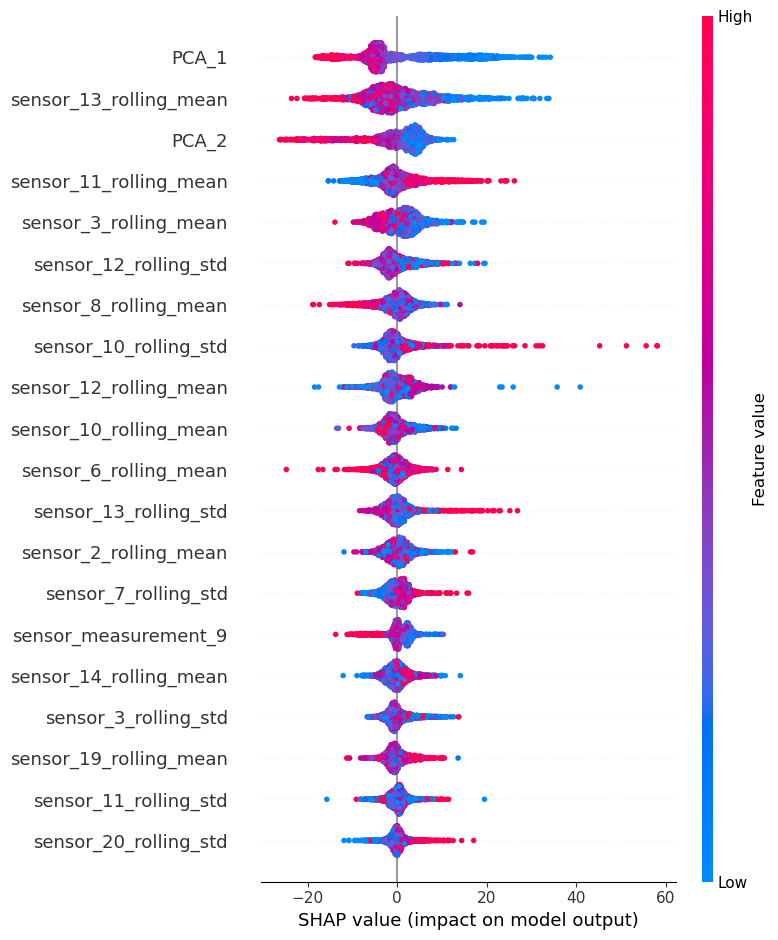

In [61]:
import shap

# SHAP for XGBoost
explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val)


#### step 7. further Tuning 

In [64]:
# Hyperparameter Tuning for XGBoost

# To fine-tune the XGBoost model, we will use GridSearchCV to search for the best hyperparameters. This approach will involve testing different values for parameters like n_estimators, max_depth, learning_rate, and subsample

In [65]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],           # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],# Learning rate for optimization
    'subsample': [0.8, 1.0],          # Fraction of samples used for each tree
    'colsample_bytree': [0.8, 1.0]    # Fraction of features used for each tree
}

# Initialize the XGBoost model
xgb_model = XGBRegressor()

# Set up GridSearchCV to search over the hyperparameters
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                               cv=5, scoring='neg_mean_squared_error', verbose=1)

# Perform the grid search
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters found: {grid_search_xgb.best_params_}")
print(f"Best score (negative MSE): {grid_search_xgb.best_score_}")

# Use the best estimator to make predictions
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_val)

# Evaluate the tuned model
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse_xgb = mean_squared_error(y_val, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)

print(f"XGBoost Tuned RMSE: {rmse_xgb}")
print(f"XGBoost Tuned MAE: {mae_xgb}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best score (negative MSE): -1861.4330685339883
XGBoost Tuned RMSE: 42.25802459462467
XGBoost Tuned MAE: 32.50746325391219


In [66]:
# # # LSTM Hyperparameter Tuning and More 
# # adjust parameters such as the number of LSTM units, the optimizer, batch size, and the number of epochs. 
# experiment with dropout to prevent overfitting.

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


328/328 - 1s - 3ms/step - loss: 4342.4146 - val_loss: 2806.2222
Epoch 2/50
328/328 - 0s - 972us/step - loss: 2610.8013 - val_loss: 2448.1189
Epoch 3/50
328/328 - 0s - 913us/step - loss: 2367.4717 - val_loss: 2302.7036
Epoch 4/50
328/328 - 0s - 965us/step - loss: 2319.8003 - val_loss: 2280.5112
Epoch 5/50
328/328 - 0s - 919us/step - loss: 2307.3911 - val_loss: 2274.6802
Epoch 6/50
328/328 - 0s - 936us/step - loss: 2301.0962 - val_loss: 2266.6028
Epoch 7/50
328/328 - 0s - 1ms/step - loss: 2282.0708 - val_loss: 2257.5793
Epoch 8/50
328/328 - 0s - 854us/step - loss: 2277.1482 - val_loss: 2254.5623
Epoch 9/50
328/328 - 0s - 1ms/step - loss: 2268.3540 - val_loss: 2251.5056
Epoch 10/50
328/328 - 0s - 935us/step - loss: 2263.6379 - val_loss: 2252.3167
Epoch 11/50
328/328 - 0s - 905us/step - loss: 2267.4517 - val_loss: 2252.0889
Epoch 12/50
328/328 - 0s - 1ms/step - loss: 2263.7385 - val_loss: 2247.3369
Epoch 13/50
328/328 - 0s - 855us/step - loss: 2255.1201 - val_loss: 2246.3586
Epoch 14/50
32

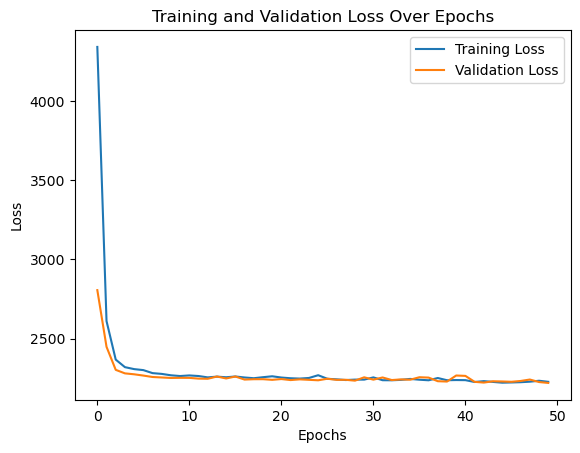

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
LSTM Tuned RMSE: 47.11860409075273
LSTM Tuned MAE: 36.85493039206359


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Reshape data for LSTM (the shape is samples, timesteps, features)
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_lstm = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))

# Define the LSTM model with Dropout to prevent overfitting
lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dropout(0.2))  # Add dropout for regularization
lstm_model.add(Dense(1))  # Output layer

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model with more epochs
history = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, 
                         validation_data=(X_val_lstm, y_val), verbose=2)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Make predictions
y_pred_lstm = lstm_model.predict(X_val_lstm)

# Evaluate the LSTM model
rmse_lstm = mean_squared_error(y_val, y_pred_lstm, squared=False)
mae_lstm = mean_absolute_error(y_val, y_pred_lstm)

print(f'LSTM Tuned RMSE: {rmse_lstm}')
print(f'LSTM Tuned MAE: {mae_lstm}')


In [68]:
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), 
                   activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4])),
                  loss='mse')
    return model

# Initialize tuner
tuner = kt.Hyperband(build_model, objective='val_loss', max_epochs=50, factor=3)

# Perform the hyperparameter search
tuner.search(X_train_lstm, y_train, epochs=50, validation_data=(X_val_lstm, y_val))

# Get the best model
best_lstm_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
y_pred_best_lstm = best_lstm_model.predict(X_val_lstm)
rmse_best_lstm = mean_squared_error(y_val, y_pred_best_lstm, squared=False)
mae_best_lstm = mean_absolute_error(y_val, y_pred_best_lstm)

print(f'Best LSTM RMSE: {rmse_best_lstm}')
print(f'Best LSTM MAE: {mae_best_lstm}')


Trial 8 Complete [00h 00m 01s]
val_loss: 6777.47216796875

Best val_loss So Far: 2362.869873046875
Total elapsed time: 00h 00m 14s
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Best LSTM RMSE: 48.60936150577705
Best LSTM MAE: 39.045377022713005


/opt/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [69]:
#### step 8. implement Model-Agnostic Meta-Learning (MAML)

In [70]:
# MAML is a meta-learning technique that enables a model to learn a good initialization from which it can quickly adapt to new tasks (engines, in our case) with minimal data.

In [71]:

    # Meta-Training Phase: The model is trained on multiple engines (tasks). During meta-training, the goal is not to find a single model that works for all engines but to find a good initialization point for the model parameters.
    # Meta-Testing (Adaptation): When a new engine is presented (a new task), the model can quickly adapt using just a few gradient updates.

In [72]:
# # Prepare the Data
# split each engine's time-series data into a training set and a test set for MAML. modify the function

In [73]:
# define the model: a simple feedforward neural network as our base model for MAML,can also be replaced  with an LSTM or any other model

In [74]:
# # MAML Algorithm
# use Higher to make inner-loop updates for each task.

In [75]:
# Meta-Training Loop
# define the meta-training loop. This loop runs over all tasks and optimizes the model so that it can quickly adapt to new tasks (engines).

In [76]:
# Meta-Testing (Adaptation to New Engines)

In [77]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np
# import torch
# import torch.nn as nn
# import torch.optim as optim

# # Step 1: Define column names for the dataset
# columns = ['unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 
#            'operational_setting_3'] + ['sensor_measurement_' + str(i) for i in range(1, 22)]

# # Load the dataset
# data = pd.read_csv('../Nassturboengine/test_FD001.txt', delim_whitespace=True, header=None)
# data.columns = columns  # Assign column names

# # Step 2: Scaling the data
# scale_columns = ['operational_setting_1', 'operational_setting_2', 'operational_setting_3'] + \
#                 ['sensor_measurement_' + str(i) for i in range(1, 22)]

# scaler = MinMaxScaler()
# data[scale_columns] = scaler.fit_transform(data[scale_columns])

# # Step 3: Define model parameters
# input_dim = len(scale_columns)  # Number of input features (sensor + operational)
# hidden_dim = 64  # Hidden units in the MAML model
# output_dim = 1  # Predicting RUL

# # Helper Functions for Task Creation, MAML Model, and Training

# # Function to create tasks (splitting data into training and validation tasks)
# def create_tasks(data, split_ratio=0.8):
#     tasks = []
#     engine_ids = data['unit_number'].unique()
#     for engine_id in engine_ids:
#         engine_data = data[data['unit_number'] == engine_id]
#         n_train = int(split_ratio * len(engine_data))
#         train_data = engine_data[:n_train]
#         val_data = engine_data[n_train:]
        
#         tasks.append({'train': (train_data[scale_columns], train_data['time_in_cycles']),
#                       'test': (val_data[scale_columns], val_data['time_in_cycles'])})
#     return tasks

# # Define the MAML Model Class
# class MAMLModel(nn.Module):
#     def __init__(self, input_dim, hidden_dim, output_dim):
#         super(MAMLModel, self).__init__()
#         self.l1 = nn.Linear(input_dim, hidden_dim)
#         self.l2 = nn.Linear(hidden_dim, output_dim)

#     def forward(self, x):
#         x = torch.relu(self.l1(x))
#         return self.l2(x)

# # Function for a single MAML step (task-specific learning)
# def maml_step(model, task_data, fast_lr, n_inner_steps):
#     model.train()

#     # Convert task data to tensors
#     x_train = torch.tensor(task_data['train'][0].values, dtype=torch.float32)
#     y_train = torch.tensor(task_data['train'][1].values, dtype=torch.float32)
    
#     x_test = torch.tensor(task_data['test'][0].values, dtype=torch.float32)
#     y_test = torch.tensor(task_data['test'][1].values, dtype=torch.float32)
    
#     # Create the inner-loop optimizer
#     fast_optimizer = optim.SGD(model.parameters(), lr=fast_lr)
    
#     # Inner-loop training (fast updates)
#     for _ in range(n_inner_steps):
#         fast_optimizer.zero_grad()
#         predictions = model(x_train).squeeze()
#         loss = nn.MSELoss()(predictions, y_train)
#         loss.backward()
#         fast_optimizer.step()
    
#     # Return the loss on the test set for meta-optimization
#     with torch.no_grad():
#         test_predictions = model(x_test).squeeze()
#         test_loss = nn.MSELoss()(test_predictions, y_test)
    
#     return test_loss.item()  # Convert to scalar

# # Meta-Training Function
# def meta_train(model, tasks, meta_lr, fast_lr, n_inner_steps, n_meta_steps):
#     meta_optimizer = optim.Adam(model.parameters(), lr=meta_lr)
    
#     for step in range(n_meta_steps):
#         meta_loss = 0.0
        
#         # Loop over tasks (engines)
#         for task in tasks:
#             task_loss = maml_step(model, task, fast_lr, n_inner_steps)
#             meta_loss += task_loss
        
#         # Convert meta_loss to tensor with requires_grad enabled
#         meta_loss_tensor = torch.tensor(meta_loss, dtype=torch.float32, requires_grad=True)
        
#         # Meta-optimization (update model's parameters)
#         meta_optimizer.zero_grad()
#         meta_loss_tensor.backward()
#         meta_optimizer.step()
        
#         if step % 10 == 0:
#             print(f"Meta Step {step}, Meta Loss: {meta_loss_tensor.item()}")

# # Adaptation to New Engine
# def adapt_to_new_engine(model, task_data, fast_lr, n_inner_steps):
#     model.train()
    
#     # Convert task data to tensors
#     x_train = torch.tensor(task_data['train'][0].values, dtype=torch.float32)
#     y_train = torch.tensor(task_data['train'][1].values, dtype=torch.float32)
    
#     # Create the inner-loop optimizer
#     fast_optimizer = optim.SGD(model.parameters(), lr=fast_lr)
    
#     # Inner-loop training (fine-tuning for new engine)
#     for _ in range(n_inner_steps):
#         fast_optimizer.zero_grad()
#         predictions = model(x_train).squeeze()
#         loss = nn.MSELoss()(predictions, y_train)
#         loss.backward()
#         fast_optimizer.step()
    
#     # After adaptation, return the adapted model
#     return model

# # Step 4: Create tasks
# tasks = create_tasks(data, split_ratio=0.8)

# # Step 5: Initialize MAML model
# model = MAMLModel(input_dim, hidden_dim, output_dim)

# # Step 6: Meta-training
# meta_train(model, tasks, meta_lr=1e-3, fast_lr=1e-2, n_inner_steps=5, n_meta_steps=100)

# # Step 7: Adapt to a new engine
# adapt_to_new_engine(model, tasks[0], fast_lr=1e-2, n_inner_steps=5)


In [78]:
# Understanding the Output/results
# Meta Loss Values:
# Meta Step values represent the current step or iteration in the meta-training process.
# Meta Loss values show the cumulative loss across all tasks in each meta-step.
# For example, at Meta Step 0, the loss is 718133.3125. By Meta Step 10, the loss has decreased to 652644.3125, indicating that the model is learning and the loss is improving.

# Consistency in Loss Values:
# After a certain point (e.g., Meta Step 20), the loss values stabilize around 652644. This indicates that the model's performance on the meta-objective (i.e., the aggregated loss across all tasks) is not improving significantly.

# This could be due to several reasons:
# Plateau in Learning: The model might have reached a plateau where additional training steps don’t significantly reduce the loss.
# Learning Rate Issues: The learning rate might be too high or too low, affecting the convergence.
# Task Difficulty or Data Quality: The tasks or the data might be too challenging or not diverse enough to further improve the model.

# Model Architecture
# the model has the following architecture:

# MAMLModel(
#   (l1): Linear(in_features=24, out_features=64, bias=True)
#   (l2): Linear(in_features=64, out_features=1, bias=True)
# )

# l1: This is the first linear layer. It takes an input of size 24 (number of features) and transforms it to a hidden dimension of size 64. This layer learns the representations of the input features.
# l2: This is the second linear layer. It takes the output of size 64 from the first layer and reduces it to a single output dimension (1). This is where the final prediction (e.g., RUL - Remaining Useful Life) is generated.


# Interpretation of the Results
# Initial Improvement:
# The decrease in Meta Loss from 718133.3125 to 652644.3125 suggests that the model is initially learning to generalize better across tasks.

# Stabilization:
# Once the loss stabilizes, further steps might not improve the loss much. This could indicate:
# Convergence: The model might be converging, and further training might be unnecessary unless you adjust the hyperparameters.
# Hyperparameter Tuning: Adjusting learning rates or exploring different architectures might be necessary.

# Loss Value Insights:
# The loss values being consistently around 652644 suggest that the model has found a local minimum where it performs reasonably well but might not be optimal.

In [79]:
##Analyzing and potentially augmenting the dataset could help improve model performance

In [80]:
# check the distribution of the data across different tasks to ensure they are well-represented. analysis of the data distribution by unit_number:

In [81]:
# import matplotlib.pyplot as plt

# # Distribution of data across different unit numbers
# task_counts = data['unit_number'].value_counts()

# plt.figure(figsize=(12, 6))
# plt.bar(task_counts.index, task_counts.values, color='skyblue')
# plt.xlabel('Unit Number')
# plt.ylabel('Number of Samples')
# plt.title('Distribution of Samples Across Units')
# plt.show()

# # Checking some basic statistics
# print("Data Statistics:")
# print(data.describe())


In [82]:
# Augmenting Data:

# certain units are under-represented, so we  perform data augmentation. A simple form of augmentation for time series data can be adding noise:

In [83]:
# def augment_data(df, noise_level=0.01):
#     """Add noise to the dataset to augment data."""
#     noisy_df = df.copy()
#     for col in df.columns:
#         if df[col].dtype == 'float64' or df[col].dtype == 'int64':
#             noisy_df[col] += np.random.normal(0, noise_level, size=df[col].shape)
#     return noisy_df

# #augmenting data for a specific unit
# augmented_data = augment_data(data[data['unit_number'] == 1])


In [84]:
# Hyperparameter Tuning

In [85]:
# experiment with different learning rates, using a loop to train the model with various learning rates and observing their effect

In [86]:
# def hyperparameter_tuning(task_data, meta_lrs, fast_lrs, n_inner_steps, n_meta_steps):
#     results = {}
    
#     for meta_lr in meta_lrs:
#         for fast_lr in fast_lrs:
#             model = MAMLModel(input_dim, hidden_dim, output_dim)
#             print(f"Training with meta_lr={meta_lr}, fast_lr={fast_lr}")
#             meta_train(model, task_data, meta_lr, fast_lr, n_inner_steps, n_meta_steps)
#             # Here, we would save or record the model performance
#             # For simplicity, we will just record the final meta loss
#             results[(meta_lr, fast_lr)] = model
    
#     return results

# # learning rates to test
# meta_lrs = [1e-3, 1e-4, 1e-5]
# fast_lrs = [1e-2, 1e-3, 1e-4]

# # Perform hyperparameter tuning
# results = hyperparameter_tuning(tasks, meta_lrs, fast_lrs, n_inner_steps=5, n_meta_steps=100)


In [87]:
### more way to fine tune would be Increasing Training Time

## modifying the n_meta_steps parameter and using a checkpointing strategy to save my progress

#### Step 9: Save Models for Deployment

In [89]:
# Save the model and preprocessing pipeline for future use or deployment

In [90]:
import pickle

# Save the XGBoost model
with open('xgboost_model.pickle', 'wb') as file:
    pickle.dump(best_xgb_model, file)


In [91]:
# Save the LSTM model
with open('lstm_model.pickle', 'wb') as file:
    pickle.dump(best_lstm_model, file)


In [ ]:
#### step 10. making prediction

In [188]:
import joblib
import pickle

# Save the XGBoost model
joblib.dump(best_xgb_model, 'xgboost_model.pkl')

# Save the LSTM model (If needed for future use with Keras)
best_lstm_model.save('lstm_model.h5')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the PCA
joblib.dump(pca, 'pca.pkl')


['pca.pkl']